In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# 가설검정
from scipy import stats

# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 자연어 처리
# import spacy

In [2]:
df=pd.read_csv('../data/1_original_useDf_0711.csv')

In [3]:
df.head(1)

,#,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,7.3,96.0,91.0,96.0,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0


In [4]:
#df.info()
df.isnull().sum()

#                           0
Title                       0
Series or Movie             0
COUNTRY                   206
Release Date               65
GENRE                     370
VALUE                       0
Genre_all                 118
Tags                        9
Languages                 149
Hidden Gem Score          152
Country Availability        5
Runtime                     0
Director                  713
Writer                    514
Actors                    138
View Rating               708
IMDb Score                152
Rotten Tomatoes Score    1385
Metacritic Score         1510
Awards Received          1490
Awards Nominated For     1090
Boxoffice                1665
Netflix Release Date        0
Production House         1492
Summary                     2
IMDb Votes                152
dtype: int64

In [5]:
df.describe().round()

,#,VALUE,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,2960.0,2960.0,2808.0,2808.0,1575.0,1450.0,1470.0,1870.0,2808.0
mean,1480.0,634.0,5.0,6.0,54.0,54.0,11.0,21.0,94402.0
std,855.0,2202.0,2.0,1.0,27.0,17.0,24.0,41.0,190158.0
min,0.0,1.0,1.0,2.0,0.0,5.0,1.0,1.0,5.0
25%,740.0,22.0,3.0,6.0,30.0,41.0,2.0,3.0,1759.0
50%,1480.0,80.0,4.0,6.0,54.0,53.0,4.0,7.0,17586.0
75%,2219.0,321.0,7.0,7.0,78.0,66.0,10.0,19.0,107313.0
max,2959.0,44867.0,10.0,10.0,100.0,100.0,300.0,386.0,2308981.0


# viewpoint 정규화

In [6]:
df['VALUE_std']=(df['VALUE']-df['VALUE'].min())/df['VALUE'].max()

In [7]:
df['VALUE_norm']=(df['VALUE']-df['VALUE'].mean())/df['VALUE'].std()

# Country_all 변수 추가 (country 와 Country Availability 결합)

In [8]:
df['country_all']=df['COUNTRY']+','+df['Country Availability'] # (?)country_all에 중복되는 문자열 골라내기 

In [9]:
df

,#,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,96.0,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"United States,Lithuania,Canada,Australia,Polan..."
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",...,NaN,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0,0.939399,18.852190,"Poland,Poland,Russia,United Kingdom,Slovakia,C..."
2,2,emilyinparis,TV,United States,2020.10.2,Drama,27138,"Comedy, Drama, Romance","Comedy Programmes,Drama Programmes,Romantic TV...","French, English",...,1.0,3.0,NaN,2020.10.2,NaN,"After landing her dream job in Paris, Chicago ...",45000.0,0.604832,12.035656,"United States,Canada,Lithuania,Australia,Polan..."
3,3,lucifer,TV,United States,2016.1.25,Superhero,25729,"Horror, Thriller","TV Dramas,Police TV Shows,TV Sci-Fi & Fantasy,...",English,...,NaN,NaN,NaN,2017.7.24,NaN,"Bored with being the Lord of Hell, the devil r...",57.0,0.573428,11.395826,"United States,South Korea,Iceland,Hungary,Aust..."
4,4,theumbrellaacademy,TV,United States,2019.2.15,Superhero,23480,"Action, Adventure, Comedy, Drama, Fantasy, Sci-Fi","TV Sci-Fi & Fantasy,US TV Shows,TV Action & Ad...",English,...,7.0,28.0,NaN,2019.2.15,NaN,"Reunited by their fathers death, estranged sib...",159677.0,0.523302,10.374549,"United States,Lithuania,Brazil,Israel,Spain,Sl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2955,thebournesupremacy,Movie,United States,2004.7.23,Action,1,"Action, Mystery, Thriller","Action Thrillers,Spy Action & Adventure,Action...","English, Russian, German, Italian",...,5.0,22.0,"$176,241,941",2015.4.14,"Universal Pictures, Hypnotic, Kennedy/Marshall","Flushed from his refuge by an assassin, Jason ...",435887.0,0.000000,-0.287326,"United States,Japan,France,Russia,South Korea,..."
2956,2956,justfriends,Movie,United States,2005.11.23,Romance,1,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",English,...,NaN,3.0,"$32,619,671",2015.4.14,"Cinerenta, Benderspink, Just Friends Productio...","Years after high school, a once-portly nice gu...",106951.0,0.000000,-0.287326,"United States,Romania,South Korea,United Kingd..."
2957,2957,child44,Movie,United States,2015.3.15,Thriller,1,"Crime, Drama, History, Mystery, Thriller","Dramas based on a book,Dramas,Thrillers,Crime ...","English, Russian",...,NaN,2.0,"$1,224,330",2016.12.4,Scott Free Productions,"In 1950s Russia, a former war hero investigate...",66251.0,0.000000,-0.287326,"United States,Germany,India"
2958,2958,draculauntold,Movie,United States,2014.10.3,Horror,1,"Action, Drama, Fantasy, Horror, War","Horror Movies,Sci-Fi & Fantasy,Action & Advent...","English, Turkish",...,3.0,5.0,"$56,280,355",2016.3.28,Michael De Luca,A medieval warrior and ruler must become a vam...,180432.0,0.000000,-0.287326,"United States,Switzerland,Canada,Poland,Italy,..."


In [10]:
df['country_all'].head(3)

0    United States,Lithuania,Canada,Australia,Polan...
1    Poland,Poland,Russia,United Kingdom,Slovakia,C...
2    United States,Canada,Lithuania,Australia,Polan...
Name: country_all, dtype: object

# showingOn_count 변수 추가

In [11]:
len(str(df['country_all'].iloc[0]).split(','))

37

In [12]:
rows = len(df['country_all'])

In [13]:
df['country_all']

0       United States,Lithuania,Canada,Australia,Polan...
1       Poland,Poland,Russia,United Kingdom,Slovakia,C...
2       United States,Canada,Lithuania,Australia,Polan...
3       United States,South Korea,Iceland,Hungary,Aust...
4       United States,Lithuania,Brazil,Israel,Spain,Sl...
                              ...                        
2955    United States,Japan,France,Russia,South Korea,...
2956    United States,Romania,South Korea,United Kingd...
2957                          United States,Germany,India
2958    United States,Switzerland,Canada,Poland,Italy,...
2959    United States,Japan,United Kingdom,Mexico,Cana...
Name: country_all, Length: 2960, dtype: object

In [14]:
df['showingOn_count'] = 0

In [15]:
for i in range(rows):
    df.showingOn_count[i]=len(str(df['country_all'].iloc[i]).split(','))

In [16]:
df.head(5)

,#,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all,showingOn_count
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"United States,Lithuania,Canada,Australia,Polan...",37
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",...,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0,0.939399,18.852190,"Poland,Poland,Russia,United Kingdom,Slovakia,C...",37
2,2,emilyinparis,TV,United States,2020.10.2,Drama,27138,"Comedy, Drama, Romance","Comedy Programmes,Drama Programmes,Romantic TV...","French, English",...,3.0,NaN,2020.10.2,NaN,"After landing her dream job in Paris, Chicago ...",45000.0,0.604832,12.035656,"United States,Canada,Lithuania,Australia,Polan...",37
3,3,lucifer,TV,United States,2016.1.25,Superhero,25729,"Horror, Thriller","TV Dramas,Police TV Shows,TV Sci-Fi & Fantasy,...",English,...,NaN,NaN,2017.7.24,NaN,"Bored with being the Lord of Hell, the devil r...",57.0,0.573428,11.395826,"United States,South Korea,Iceland,Hungary,Aust...",36
4,4,theumbrellaacademy,TV,United States,2019.2.15,Superhero,23480,"Action, Adventure, Comedy, Drama, Fantasy, Sci-Fi","TV Sci-Fi & Fantasy,US TV Shows,TV Action & Ad...",English,...,28.0,NaN,2019.2.15,NaN,"Reunited by their fathers death, estranged sib...",159677.0,0.523302,10.374549,"United States,Lithuania,Brazil,Israel,Spain,Sl...",37


In [17]:
# 정규화 진행

df['showingOn_count_norm'] = (df['showingOn_count'] - df['showingOn_count'].min())/df['showingOn_count'].max()  ## 

In [18]:
type(df.showingOn_count)

pandas.core.series.Series

# 상영 국가 수와 viewpoint

In [19]:
df.head(1)

,#,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all,showingOn_count,showingOn_count_norm
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"United States,Lithuania,Canada,Australia,Polan...",37,0.972973


In [20]:
df_count = df[['#','VALUE','showingOn_count']]

In [21]:
df_count.isnull().sum()

#                  0
VALUE              0
showingOn_count    0
dtype: int64

In [22]:
df_count.describe()

,#,VALUE,showingOn_count
count,2960.000000,2960.000000,2960.000000
mean,1479.500000,633.733446,16.586486
std,854.622724,2202.145547,14.264150
min,0.000000,1.000000,1.000000
25%,739.750000,22.000000,3.000000
50%,1479.500000,80.000000,11.000000
75%,2219.250000,321.000000,35.000000
max,2959.000000,44867.000000,37.000000


In [23]:
df_count.head(2)

,#,VALUE,showingOn_count
0,0,44867,37
1,1,42149,37


In [24]:
len(df_count['showingOn_count'].unique())

37

## 카이제곱 검정
- 귀무가설 : 두 변수는 연관성이 없다. 차이가 없다.
 - => showingOn_count의 증감은 value와 상관성이 없다.
- 대립가설 : 두 변수는 연관성이 있다. 차이가 있다.
 - => showingOn_count의 증감은 value와 상관성이 있다.

In [25]:
value = list(df_count.VALUE)
showingOn_count=list(df_count.showingOn_count)

In [26]:
chis = stats.chisquare(value,showingOn_count)

In [27]:
statistic, pvalue = chis
print(f'static : {statistic}, p-value : {pvalue}')
if pvalue < 0.05 :
    print('신뢰수준하에서 유의한 관계. 대립가설 채택')
else :
    print('신뢰수준하에서 무의미한 관계. 귀무가설 채택')

static : 626914944.2961658, p-value : 0.0
신뢰수준하에서 유의한 관계. 대립가설 채택


In [28]:
#피어스만 상관계수
# corr=stats.pearsonr(df_count.VALUE, df_count.showingOn_count)
# corr

In [29]:
#스피어만 상관계수
corr1=stats.spearmanr(df_count.VALUE, df_count.showingOn_count)
corr1

SpearmanrResult(correlation=0.3756960524649637, pvalue=7.182035682261628e-100)

In [30]:
df_count.corr(method='spearman')

,#,VALUE,showingOn_count
#,1.000000,-0.986816,-0.372766
VALUE,-0.986816,1.000000,0.375696
showingOn_count,-0.372766,0.375696,1.000000


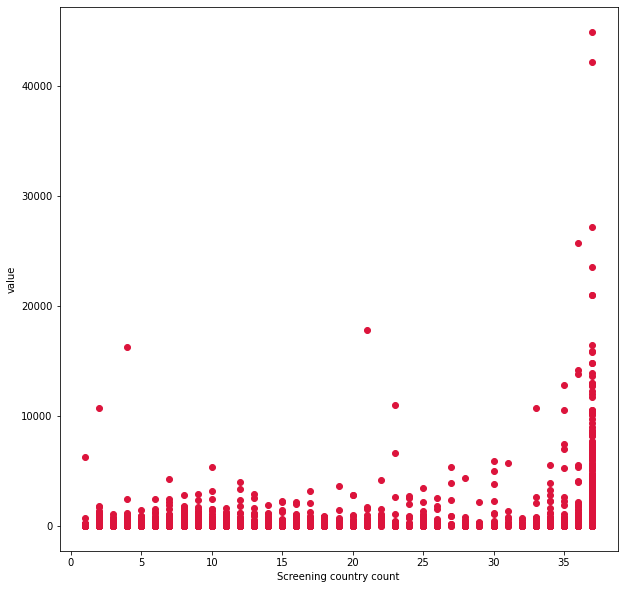

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(showingOn_count,value, c='crimson')
plt.xlabel('Screening country count')
plt.ylabel('value')
#plt.axis([0, 40, 0, 20000]) #구간 설정
plt.show()

- 카이 제곱 검정 결과 두 변수들간의 유의수준 0.05에서 showingOn_count의 증감은 value와의 상관성이 있다고 할 수 있다.
- 산점도와 상관계수를 확인을 해봤을 때, 양의 상관성이 있다고 볼 수 있다.

## country_all과 viewpoint
- 귀무가설: 상영국가들은 viewpoint에 영향이 없다.
- 대립가설: 상영국가들은 viewpoint에 영향이 있다.

In [32]:
df_country=df[['#','VALUE','country_all']]

In [33]:
df_country.head(1)

,#,VALUE,country_all
0,0,44867,"United States,Lithuania,Canada,Australia,Polan..."


In [34]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #            2960 non-null   int64 
 1   VALUE        2960 non-null   int64 
 2   country_all  2749 non-null   object
dtypes: int64(2), object(1)
memory usage: 69.5+ KB


In [35]:
df_country.sort_values('#', ascending = True, inplace=True)

In [36]:
df_view_top500 = df_country[:][:500]

**# 순위 기준 top500 country들을 country_single로 만듬**

In [37]:
df_view_top500.set_index('#',inplace=True)

In [38]:
df_view_top500.head(10)

,VALUE,country_all
#,,
0,44867,"United States,Lithuania,Canada,Australia,Polan..."
1,42149,"Poland,Poland,Russia,United Kingdom,Slovakia,C..."
2,27138,"United States,Canada,Lithuania,Australia,Polan..."
3,25729,"United States,South Korea,Iceland,Hungary,Aust..."
4,23480,"United States,Lithuania,Brazil,Israel,Spain,Sl..."
5,21012,"Mexico,Czech Republic,United States,Switzerlan..."
6,20937,"United Kingdom,Switzerland,Sweden,Netherlands,..."
7,17782,"United States,France,Belgium,Switzerland,Hong ..."
8,16427,"United Kingdom,Lithuania,France,South Africa,I..."


In [39]:
result = df_view_top500['country_all'].str.split(',') #리스트화

In [40]:
result = result.apply(lambda x: pd.Series(x))

In [ ]:
#

In [ ]:
# # 중복값 제거
# for 1,i in range(int(len(result))):
#      result[i]= np.unique(result[i]).tolist()


In [ ]:
# result.stack()
# result.stack().reset_index(level=1, drop=True) ## 인덱스 변화 확인

In [41]:
result = result.stack().reset_index(level=1, drop=True).to_frame('country_single')
result

,country_single
#,
0,United States
0,Lithuania
0,Canada
0,Australia
0,Poland
...,...
499,India
499,Argentina
499,Greece


In [ ]:
rs = result.reset_index()

In [ ]:
rs.head(50)

In [ ]:
len(rs['country_single'].unique())  # top500의 상영국가들 종류수

In [ ]:
import seaborn as sns

In [ ]:
import pandas_profiling

In [ ]:
df_count.profile_report()

# 상영 국가들과 viewpoint
- 귀무가설 : 상영국가들은 viewpoint에 영향이 없다.
- 대립가설 : 상영국가들은 viewpoint에 영향이 있다.

In [ ]:
df_showOn= df[['VALUE','country_all']]

In [ ]:
df_showOn.head()

In [ ]:
df_showOn.info()

In [ ]:
df_showOn.isnull().sum()

In [ ]:
df_showOn.describe

In [ ]:
df_showOn.set_index('VALUE',inplace=True)

In [ ]:
result = df_showOn['country_all'].str.split(',') #리스트화

In [ ]:
result = result.apply(lambda x : pd.Series(x))

In [ ]:
result.stack()

In [ ]:
result.stack().reset_index(level=1, drop=True)

In [ ]:
result = result.stack().reset_index(level=1, drop=True).to_frame('showOn_single')
result

In [ ]:
rs=result.reset_index()

In [ ]:
rs.info()

In [ ]:
len(list(rs.showOn_single.unique()))

In [ ]:
from copy import copy
exiris = copy(rs)
sns.pairplot(exiris, hue="showOn_single")

In [ ]:
df_showOn.describe

In [ ]:
rs.head(1)

In [ ]:
top1000_country = rs[:1000]

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(top1000_country.index, top1000_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')